# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries for data preparation and model building


# Setting global constants to ensure notebook results are reproducible


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df = pd.read_csv('df_train.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
# ensuring all columns are displayed
pd.set_option('display.max_columns', 0)
# look at data statistics
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [5]:
df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,6695.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,19.473392,2.425045,0.128906,0.039439,0.031912,1.377965e+03,0.000243,0.037818,0.000439,0.000205,773.527594,765.979687,1017.739549,774.658818,1012.051407,297.479527,1010.316920,291.337233,290.592152,724.722362,293.978903,65.247727,289.867648,291.157644,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,28.053660,1.672895,0.634730,0.175857,0.557264,1.407314e+04,0.003660,0.152639,0.003994,0.011866,77.313315,88.142235,10.046124,71.940009,9.506214,8.875812,22.198555,7.565692,7.162274,115.846537,7.920986,19.262322,6.907402,7.273538,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,0.000000,1.000000,0.000000,0.000000,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.000000,800.000000,1010.333333,291.312750,1012.333333,285.550167,285.150000,700.333333,288.282917,51.333333,284.783333,285.483333,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.018000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.333333,1019.000000,800.000000,1015.000000,297.101667,1017.333333,291.037000,290.176667,800.000000,293.323333,67.000000,289.550000,290.150000,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,260.000000,33.333333,3.333333,0.000000,0.000000,0.000000,1.022000e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1024.000000,800.000000,1018.000000,304.150000,1022.000000,297.248333,296.056667,801.666667,299.620333,81.333333,294.820000,296.855000,296.816667,

In [6]:
df.describe(include='all')

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763,8763.000000,8763,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,6695.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
unique,8763,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2015-01-01 03:00:00,NaN,level_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sp13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,1072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.425729,NaN,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,19.473392,2.425045,0.128906,NaN,0.039439,0.031912,1.377965e+03,0.000243,0.037818,0.000439,0.000205,773.527594,765.979687,1017.739549,774.658818,1012.051407,297.479527,1010.316920,291.337233,290.592152,724.722362,293.978903,65.247727,289.867648,291.157644,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,NaN,1.850371,NaN,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,28.053660,1.672895,0.634730,NaN,0.175857,0.557264,1.407314e+04,0.003660,0.152639,0.003994,0.011866,77.313315,88.142235,10.046124,71.940009,9.506214,8.875812,22.198555,7.565692,7.162274,115.846537,7.920986,19.262322,6.907402,7.273538,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,NaN,0.000000,NaN,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,NaN,1.000000,NaN,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.000000,800.000000,1010.333333,291.312750,1012.333333,285.550167,285.150000,700.333333,288.282917,51.333333,284.783333,285.483333,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,NaN,2.000000,NaN,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,0.000000,2.00

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [8]:
df['time'].dtype

dtype('O')

In [9]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S.%f')

In [10]:
import datetime as dt
df['time'] = df['time'].map(dt.datetime.toordinal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   int64  
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [11]:
df_dropped = df.drop(df[['Seville_pressure', 'Valencia_pressure', 'Valencia_wind_deg', 'Madrid_weather_id', 'Barcelona_weather_id', 'Seville_weather_id', 'Bilbao_weather_id']], axis=1)

In [12]:
col_names = df_dropped.columns
sorted_col_names = sorted(col_names)

In [13]:
sorted_col_names

['Barcelona_pressure',
 'Barcelona_rain_1h',
 'Barcelona_rain_3h',
 'Barcelona_temp',
 'Barcelona_temp_max',
 'Barcelona_temp_min',
 'Barcelona_wind_deg',
 'Barcelona_wind_speed',
 'Bilbao_clouds_all',
 'Bilbao_pressure',
 'Bilbao_rain_1h',
 'Bilbao_snow_3h',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Bilbao_temp_min',
 'Bilbao_wind_deg',
 'Bilbao_wind_speed',
 'Madrid_clouds_all',
 'Madrid_humidity',
 'Madrid_pressure',
 'Madrid_rain_1h',
 'Madrid_temp',
 'Madrid_temp_max',
 'Madrid_temp_min',
 'Madrid_wind_speed',
 'Seville_clouds_all',
 'Seville_humidity',
 'Seville_rain_1h',
 'Seville_rain_3h',
 'Seville_temp',
 'Seville_temp_max',
 'Seville_temp_min',
 'Seville_wind_speed',
 'Valencia_humidity',
 'Valencia_snow_3h',
 'Valencia_temp',
 'Valencia_temp_max',
 'Valencia_temp_min',
 'Valencia_wind_speed',
 'load_shortfall_3h',
 'time']

In [14]:
sorted_col_names = ['time','Barcelona_pressure',
 'Barcelona_rain_1h',
 'Barcelona_rain_3h',
 'Barcelona_temp',
 'Barcelona_temp_max',
 'Barcelona_temp_min',
 'Barcelona_wind_deg',
 'Barcelona_wind_speed',
 'Bilbao_clouds_all',
 'Bilbao_pressure',
 'Bilbao_rain_1h',
 'Bilbao_snow_3h',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Bilbao_temp_min',
 'Bilbao_wind_deg',
 'Bilbao_wind_speed',
 'Madrid_clouds_all',
 'Madrid_humidity',
 'Madrid_pressure',
 'Madrid_rain_1h',
 'Madrid_temp',
 'Madrid_temp_max',
 'Madrid_temp_min',
 'Madrid_wind_speed',
 'Seville_clouds_all',
 'Seville_humidity',
 'Seville_rain_1h',
 'Seville_rain_3h',
 'Seville_temp',
 'Seville_temp_max',
 'Seville_temp_min',
 'Seville_wind_speed',
 'Valencia_humidity',
 'Valencia_snow_3h',
 'Valencia_temp',
 'Valencia_temp_max',
 'Valencia_temp_min',
 'Valencia_wind_speed',
 'load_shortfall_3h']

In [15]:
df = df_dropped.reindex(sorted_col_names, axis=1)

In [16]:
df.head()

,time,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Bilbao_wind_deg,Bilbao_wind_speed,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_rain_1h,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_rain_1h,Seville_rain_3h,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_wind_speed,Valencia_humidity,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_speed,load_shortfall_3h
0,735599,1036.333333,0.0,0.0,281.013000,281.013000,281.013000,42.666667,6.333333,0.0,1035.000000,0.0,0.0,269.338615,269.338615,269.338615,223.333333,1.000000,0.0,64.000000,971.333333,0.0,265.938000,265.938000,265.938000,0.666667,0.0,74.333333,0.0,0.0,274.254667,274.254667,274.254667,3.333333,75.666667,0.0,269.888000,269.888000,269.888000,0.666667,6715.666667
1,735599,1037.333333,0.0,0.0,280.561667,280.561667,280.561667,139.000000,4.000000,0.0,1035.666667,0.0,0.0,270.376000,270.376000,270.376000,221.000000,1.000000,0.0,64.666667,972.666667,0.0,266.386667,266.386667,266.386667,0.333333,0.0,78.333333,0.0,0.0,274.945000,274.945000,274.945000,3.333333,71.000000,0.0,271.728333,271.728333,271.728333,1.666667,4171.666667
2,735599,1038.000000,0.0,0.0,281.583667,281.583667,281.583667,326.000000,2.000000,0.0,1036.000000,0.0,0.0,275.027229,275.027229,275.027229,214.333333,1.000000,0.0,64.333333,974.000000,0.0,272.708667,272.708667,272.708667,1.000000,0.0,71.333333,0.0,0.0,278.792000,278.792000,278.792000,2.666667,65.666667,0.0,278.008667,278.008667,278.008667,1.000000,4274.666667
3,735599,1037.000000,0.0,0.0,283.434104,283.434104,283.434104,273.000000,2.333333,0.0,1036.000000,0.0,0.0,281.135063,281.135063,281.135063,199.666667,1.000000,0.0,56.333333,994.666667,0.0,281.895219,281.895219,281.895219,1.000000,0.0,65.333333,0.0,0.0,285.394000,285.394000,285.394000,4.000000,54.000000,0.0,284.899552,284.899552,284.899552,1.000000,5075.666667
4,735599,1035.000000,0.0,0.0,284.213167,284.213167,284.213167,260.000000,4.333333,2.0,1035.333333,0.0,0.0,282.252063,282.252063,282.252063,185.000000,0.333333,0.0,57.000000,1035.333333,0.0,280.678437,280.678437,280.678437,1.000000,0.0,59.000000,0.0,0.0,285.513719,285.513719,285.513719,3.000000,58.333333,0.0,283.015115,283.015115,283.015115,1.000000,6620.666667


In [17]:
corr = df.corr()
corr

,time,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_pressure,Bilbao_rain_1h,Bilbao_snow_3h,Bilbao_temp,Bilbao_temp_max,Bilbao_temp_min,Bilbao_wind_deg,Bilbao_wind_speed,Madrid_clouds_all,Madrid_humidity,Madrid_pressure,Madrid_rain_1h,Madrid_temp,Madrid_temp_max,Madrid_temp_min,Madrid_wind_speed,Seville_clouds_all,Seville_humidity,Seville_rain_1h,Seville_rain_3h,Seville_temp,Seville_temp_max,Seville_temp_min,Seville_wind_speed,Valencia_humidity,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_speed,load_shortfall_3h
time,1.000000,-0.040146,-0.075698,-0.104322,0.067900,0.047269,0.103229,-0.140275,-0.218929,-0.068103,-0.022480,-0.249695,-0.092398,0.081584,0.146014,0.028476,-0.155852,0.049020,-0.116943,-0.103094,0.385618,-0.069017,0.088209,0.093157,0.084983,-0.109448,-0.140568,-0.078660,-0.075352,-0.082530,0.042639,0.039255,0.037193,-0.094157,0.024236,-0.028128,0.135068,0.086799,0.185224,-0.090362,0.192488
Barcelona_pressure,-0.040146,1.000000,0.053550,-0.002796,-0.033221,-0.034412,-0.029612,-0.001079,0.001280,0.037506,-0.014092,0.052458,-0.001539,-0.027410,-0.031854,-0.022514,0.034220,0.009572,0.010833,0.025198,-0.091181,-0.003937,-0.017886,-0.015984,-0.017819,0.011134,0.020264,0.021599,0.003875,-0.001685,-0.041542,-0.047179,-0.032889,-0.008853,-0.003012,-0.000473,-0.028260,-0.029292,-0.026596,0.050282,-0.034385
Barcelona_rain_1h,-0.075698,0.053550,1.000000,-0.020084,0.060384,0.083288,0.023582,-0.037854,0.042136,0.052913,-0.055521,0.052558,0.067461,0.034889,0.032362,0.031765,0.026187,-0.026640,0.008570,-0.061265,-0.016906,0.065321,0.075013,0.079558,0.070146,0.062758,0.003590,-0.051022,0.050899,-0.012500,0.069337,0.064457,0.065312,0.074540,0.009027,0.042576,0.045358,0.068789,0.015905,0.031804,-0.056633
Barcelona_rain_3h,-0.104322,-0.002796,-0.020084,1.000000,-0.042970,-0.051365,-0.029398,-0.011875,-0.001722,-0.041013,0.025215,-0.001412,0.002985,-0.043223,-0.059089,-0.027060,0.007202,-0.038246,-0.000355,0.017797,0.036706,0.018953,-0.039565,-0.046967,-0.029094,-0.014644,0.029194,0.015555,0.007454,0.145740,-0.039126,-0.070069,-0.012016,-0.019804,0.002920,-0.001905,-0.058942,-0.061068,-0.055676,-0.037553,-0.024720
Barcelona_temp,0.067900,-0.033221,0.060384,-0.042970,1.000000,0.974480,0.964089,-0.189016,0.116240,-0.023171,-0.229760,-0.138901,-0.086561,0.865705,0.831470,0.867434,0.068701,0.018967,-0.223940,-0.684867,0.010542,-0.054825,0.903143,0.900428,0.868222,0.080133,-0.186463,-0.617797,-0.098982,-0.041804,0.852651,0.693193,0.873170,0.085395,-0.247168,-0.029135,0.914601,0.912094,0.892024,-0.021456,0.182673
Barcelona_temp_max,0.047269,-0.034412,0.083288,-0.051365,0.974480,1.000000,0.885911,-0.151302,0.114497,-0.034040,-0.217623,-0.157326,-0.087943,0.867268,0.844563,0.854620,0.049775,0.011151,-0.242409,-0.691803,0.072290,-0.072734,0.896766,0.906248,0.847888,0.061854,-0.205060,-0.606770,-0.110305,-0.049273,0.866389,0.738489,0.862597,0.068902,-0.221430,-0.029249,0.901400,0.918256,0.860510,-0.040998,0.164734
Barcelona_temp_min,0.103229,-0.029612,0.023582,-0.029398,0.964089,0.885911,1.000000,-0.226583,0.109268,-0.010804,-0.230942,-0.106593,-0.079382,0.810785,0.764031,0.831224,0.086482,0.023711,-0.188578,-0.636777,-0.068083,-0.028900,0.853881,0.836680,0.838985,0.089992,-0.153412,-0.595065,-0.078631,-0.029569,0.779252,0.586923,0.831689,0.097407,-0.266820,-0.027172,0.874447,0.845057,0.879687,0.001413,0.195984
Barcelona_wind_deg,-0.140275,-0.001079,-0.037854,-0.011875,-0.189016,-0.151302,-0.226583,1.000000,0.076376,-0.065120,0.123565,-0.030723,-0.023039,-0.164656,-0.147388,-0.182302,-0.015481,-0.018225,-0.041083,0.183725,0.093900,-0.112801,-0.211319,-0.193487,-0.211010,-0.095380,-0.031373,0.164064,-0.101449,-0.043800,-0.159882,-0.083393,-0.195212,-0.098837,0.045277,-0.021024,-0.201419,-0.170304,-0.228330,-0.066071,-0.116133
Barcelona_wind_speed,-0.218929,0.001280,0.042136,-0.001722,0.116

<AxesSubplot:>

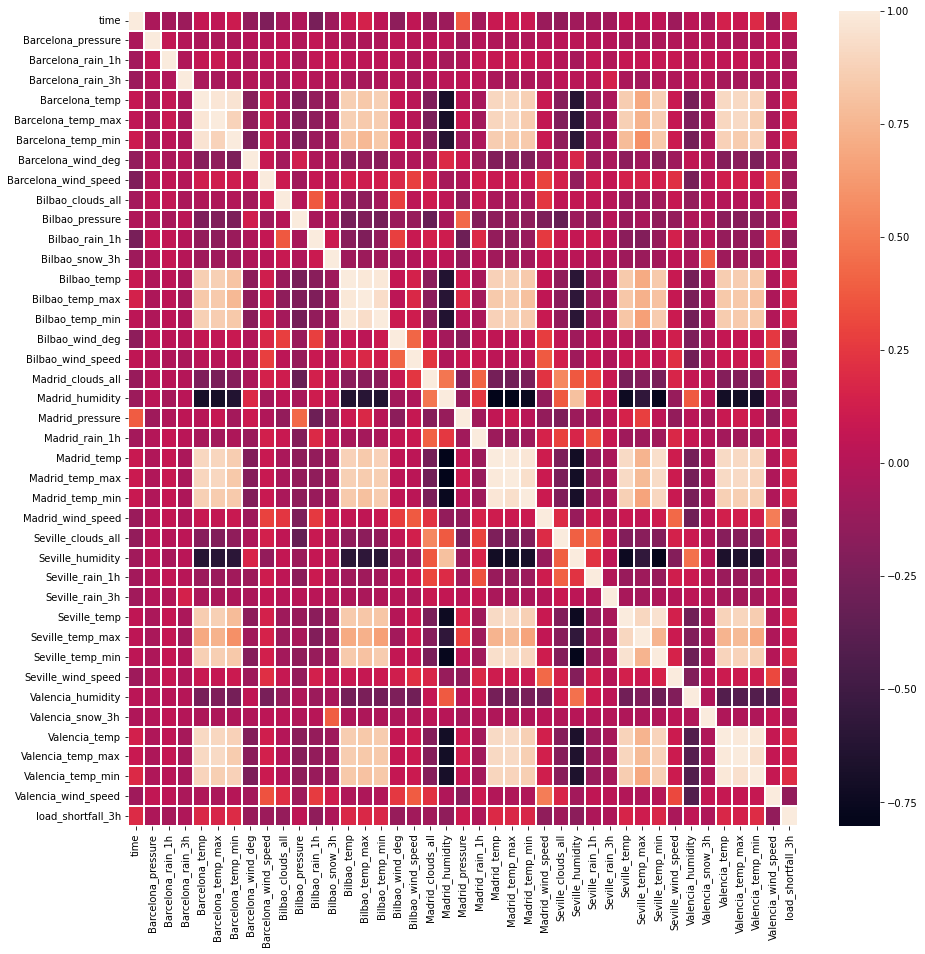

In [18]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=1.5, ax=ax)

<AxesSubplot:>

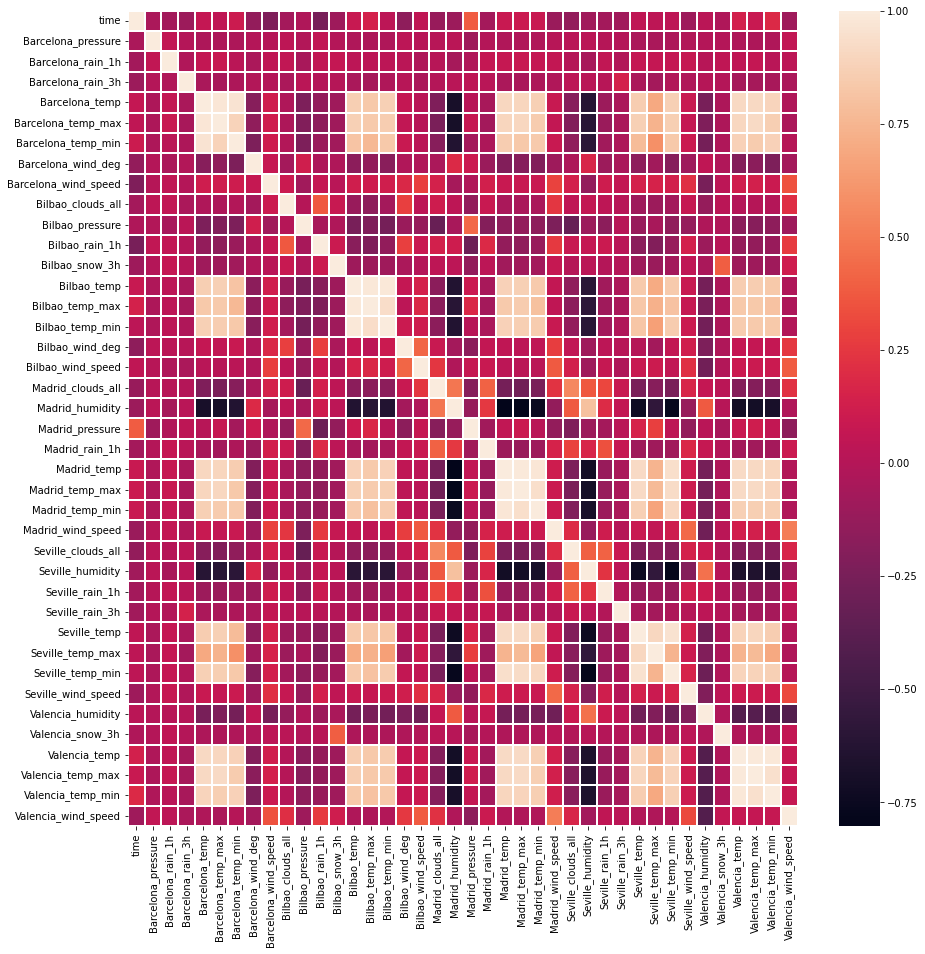

In [19]:
corr1 = df.drop('load_shortfall_3h', axis=1).corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr1, xticklabels=corr1.columns, yticklabels=corr1.columns, linewidths=1.5, ax=ax)

In [20]:
pos_corr = df.corr()[df.corr() > 0.1]['load_shortfall_3h'].dropna()
df_pos_corr = pd.DataFrame(pos_corr)
df_pos_corr

,load_shortfall_3h
time,0.192488
Barcelona_temp,0.182673
Barcelona_temp_max,0.164734
Barcelona_temp_min,0.195984
Bilbao_temp,0.176411
Bilbao_temp_max,0.180934
Bilbao_temp_min,0.172920
Madrid_temp,0.186036
Madrid_temp_max,0.182548
Madrid_temp_min,0.174744


In [21]:
neg_corr = df.corr()[df.corr() < -0.1]['load_shortfall_3h'].dropna()
df_neg_corr = pd.DataFrame(neg_corr)
df_neg_corr

,load_shortfall_3h
Barcelona_wind_deg,-0.116133
Barcelona_wind_speed,-0.103633
Bilbao_clouds_all,-0.127293
Bilbao_rain_1h,-0.152510
Bilbao_wind_deg,-0.120800
Madrid_humidity,-0.150536
Madrid_wind_speed,-0.150981
Seville_humidity,-0.167290
Valencia_wind_speed,-0.142791


In [22]:
df_corr = pd.concat([df_neg_corr, df_pos_corr], axis=0)
df_corr = df_corr.sort_values(by='load_shortfall_3h')
df_corr

,load_shortfall_3h
Seville_humidity,-0.167290
Bilbao_rain_1h,-0.152510
Madrid_wind_speed,-0.150981
Madrid_humidity,-0.150536
Valencia_wind_speed,-0.142791
Bilbao_clouds_all,-0.127293
Bilbao_wind_deg,-0.120800
Barcelona_wind_deg,-0.116133
Barcelona_wind_speed,-0.103633
Seville_temp_max,0.109834


In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [24]:
formula_str = df.columns[-1]+' ~ '+'+'.join(df_corr.T.columns[:-1]); formula_str

'load_shortfall_3h ~ Seville_humidity+Bilbao_rain_1h+Madrid_wind_speed+Madrid_humidity+Valencia_wind_speed+Bilbao_clouds_all+Bilbao_wind_deg+Barcelona_wind_deg+Barcelona_wind_speed+Seville_temp_max+Valencia_temp_max+Seville_temp+Barcelona_temp_max+Bilbao_temp_min+Valencia_temp+Seville_temp_min+Madrid_temp_min+Bilbao_temp+Bilbao_temp_max+Madrid_temp_max+Barcelona_temp+Madrid_temp+time+Barcelona_temp_min+Valencia_temp_min'

In [25]:
model = smf.ols(formula=formula_str, data=df)

In [26]:
fitted = model.fit()

In [27]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:      load_shortfall_3h   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     57.74
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          7.58e-267
Time:                        22:13:28   Log-Likelihood:                -86774.
No. Observations:                8763   AIC:                         1.736e+05
Df Residuals:                    8737   BIC:                         1.738e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -9.156e+05 

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x = df.drop('load_shortfall_3h', axis=1)
y = df['load_shortfall_3h']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [30]:
x_train.shape

(7010, 40)

In [31]:
x_test.shape

(1753, 40)

In [32]:
y_train.shape

(7010,)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

In [35]:
lr.fit(x_train, y_train)

LinearRegression()

In [36]:
beta_js = pd.DataFrame(lr.coef_, x.columns, columns=['Coefficient'])
beta_js

,Coefficient
time,0.829563
Barcelona_pressure,-0.013269
Barcelona_rain_1h,-238.965161
Barcelona_rain_3h,-23917.116135
Barcelona_temp,493.172076
Barcelona_temp_max,-137.342313
Barcelona_temp_min,-254.945737
Barcelona_wind_deg,-2.505878
Barcelona_wind_speed,-72.609613
Bilbao_clouds_all,-8.179382


<AxesSubplot:xlabel='time', ylabel='load_shortfall_3h'>

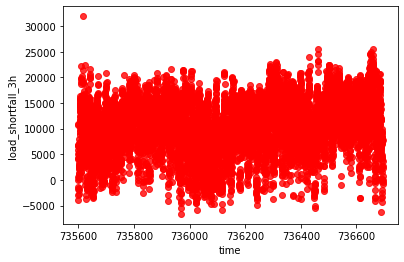

In [37]:
sns.regplot(x='time', y='load_shortfall_3h', data=df, color='red')

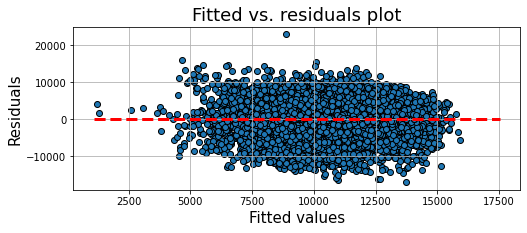

In [38]:
# plot relevant feature interactions
plt.figure(figsize=(8,3))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin = min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

In [39]:
# evaluate correlation


In [40]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [41]:
# remove missing values/ features

In [42]:
# create new features

In [43]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [44]:
# split data

In [45]:
# create targets and features dataset

In [46]:
# create one or more ML models

In [47]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [48]:
# Compare model performance

In [49]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [50]:
# discuss chosen methods logic